# Методы оптимизации в машинном обучении

Выполнил: Первойкин Илья Сергеевич, НПМбд-02-20

### О задании

Настоящее практическое задание посвящено методу градиентного спуска и методу Ньютона. Задание состоит из пяти разделов. В каждом разделе вам предлагается выполнить несколько заданий.

# Теоретическая часть

# 1. Алгоритмы

## 1.1. Методы спуска: Общая концепция

Рассматриваем задачу гладкой безусловной оптимизации:
$$\underset{x∈R^n}{min} f(x).$$

Методы спуска итеративно строят последовательность точек $(x_k)^∞_{k=0}$ из $R^n$ по правилу
$$x_{k+1}=x_k+α_kd_k.$$

Число k= 0, 1 ,... называется номером итерации метода. Скаляр $α_k ≥ 0$ называется длиной шага, а вектор $d_k∈R^n$ называется направлением поиска. В методах спуска требуется, чтобы направление поиска $d_k$ являлось направлением спуска для функции f в точке $x_k$, т. е. удовлетворяло нервенству.

$$〈∇f(x_k),d_k〉< 0. $$

В этом случае можно гарантировать, что для всех достаточно маленьких $α_k$ значение функции f в новой точкеx k+1 уменьшится:
$$f(x_{k+1})< f(x_k).$$
Общая схема метода спуска приведена ниже:

**Алгоритм 1** Общая схема метода спуска  
**Вход:** Начальная точка $x_0$; максимальное число итераций $K$.  
1:**for k ← 0 to K do**  
2:&nbsp;&nbsp;&nbsp;&nbsp;*(Вызов оракула)* Вычислить $f(x_k), ∇f(x_k)$ и пр.  
3:&nbsp;&nbsp;&nbsp;&nbsp;*(Критерий остановки)* Если выполнен критерий остановки, то выход.  
4:&nbsp;&nbsp;&nbsp;&nbsp;*(Вычисление направления)* Вычислить направление спуска $d_k$.  
5:&nbsp;&nbsp;&nbsp;&nbsp;*(Линейный поиск)* Найти подходящую длину шага $α_k$.  
6:&nbsp;&nbsp;&nbsp;&nbsp;*(Обновление)* $x_{k+1} ← x_k + α_k d_k$.  
7:**end for**  
**Выход:** Последняя вычисленная точка $x_k$



## 1.2. Критерий остановки

Идеальным критерием остановки в методе является проверка условия $$f(x_k)−f^*< \tilde{ε}$$, где $f^*$ - минимальное значение функции $f$, а $\tilde{ε} > 0$ - заданная точность. Такой критерий целесообразно использовать, если оптимальное значение функции $f$ известно. К сожалению, зачастую это не так, и поэтому нужно использовать другой критерий. Наиболее популярным является критерий, основанный на норме градиента: $$‖∇f(x_k)‖^2_2 <\tilde{ε}$$. Квадрат здесь ставят за тем, что для "хороших" функций невязка по функции $f(x_k)−f^*$ имеет тот же порядок, что и $‖∇f(x_k)‖^2_2$ , а не $‖∇f(x_k)‖_2$ (например, это верно для сильно-выпуклых функций с липшицевым градиентом.); например, если $‖∇f(x_k)‖_2 ∼ 10^{−5}$, то $f(x_k)−f^* ∼ 10^{−10}$. Наконец, для того, чтобы критерий не зависел от того, измеряется ли функция $f$ в "метрах" или в "километрах" (т. е. не изменялся при переходе от функции $f$ к функции $tf$, где $t > 0$), то имеет смысл использовать следующий относительный вариант критерия:
$$ ‖∇f(x_k)‖^2_2 ≤ ε‖∇f(x_0)‖^2_2 \tag{1.1},$$
где $ε∈(0,1)$ - заданная относительнаяточность. Таким образом, критерий остановки (1.1) гарантирует, что метод уменьшит начальную невязку $‖∇f(x_0)‖_2$ в $ε^{−1}$ раз. В этом задании Вам нужно будет во всех методах использовать критерий остановки (1.1).

## 1.3. Линейный поиск

Рассматривается функция
$$φ_k(α) := f(x_k+αd_k).$$
Заметим, что
$$φ′_k(α) =〈∇f(x_k+αd_k), d_k〉.$$

Поскольку $d_k$ является направлением спуска, то $φ′(0) =〈∇f(x_k),d_k〉< 0$.
Условием Армихо для $α$ называется выполение следующего неравенства:

$$φ_k(α) ≤ φ_k(0) + c_1 αφ′_k(0),$$
где $c_1 ∈(0, 0.5)$ - некоторая константа.
Для поиска точки $α$, удовлетворяющей условию Армихо, обычно используют следующую процедуру - метод дробления шага (бэктрекинг):

**Алгоритм 2** Метод дробления шага  
**Вход:** Функция $φ_k:R_+ → R$. Начальная точка: $α^{(0)}_k$.  
1:$α ← α^{(0)}_k.$  
2:**while** $φ_k(α) > φ(0) + cαφ′_k(0)$ **do**  
3:&nbsp;&nbsp;&nbsp;&nbsp;$α ← α/2$.  
4:**end while**
**Выход:** $α$  

"Адаптивный" метод подбора шага запоминает величину $α_k$, найденную на текущей итерации и
на следующей итерации начинает процедуру дробления с $α(0)_{k+1}:= 2α_k$. Исключение здесь составляют ньютоновские и квазиньютоновские методы - в этих методах процедуру дробления шага всегда нужно начинать с $α(0)_k := 1$.

**Сильные условия Вульфа:**
$$φ_k(α) ≤ φ(0) + c_1 α φ′_k(0)$$
$$|φ′_k(α)|≤ c_2 |φ′_k(0)|$$

Здесь $c_1 ∈ (0, 0.5), c_2 ∈ (c_1, 1)$.  
Самостоятельно реализовывать схему для сильных условий Вульфа не нужно. Используйте биб-
лиотечную реализацию (функция `scalar_search_wolfe2` из модуля `scipy.optimize.linesearch`). В

ней начальная длина шага $α^{(0)}_k$ автоматически выбирается равной 1.




# 2. Модели

## 2.1. Двухклассовая логистическая регрессия

Логистическая регрессия является стандартной моделью в задачах классификации. Для простоты
рассмотрим лишь случай бинарной классификации. Неформально задача формулируется следующим
образом. Имеется обучающая выборка $((a_i, b_i))^m_{i=1}$, состоящая изmвекторов $a_i ∈ R^n$ (называемых признаками) и соответствующих им чисел $b_i ∈ {−1, 1}$ (называемых классами). Нужно построить алгоритм $b(·)$, который для произвольного нового вектора признаков $a$ автоматически определит его класс $b(a)∈{−1, 1}$.  

В модели логистической регрессии определение класса выполняется по знаку линейной комбинации
компонент вектораaс некоторыми фиксированными коэффициентами $x∈R^n$:
$$b(a) := sign(〈a,x〉).$$

Коэффициенты $x$ являются параметрами модели и настраиваются с помощью решения следующей
оптимизационной задачи:
$$\underset{x∈R^n}{min} \left( \frac{1}{m}\sum_{i=1}^m ln(1 + exp(−b_i〈a_i, x〉)) + \frac{λ}{2}‖x‖^2_2 \right) $$
где $λ > 0$ - коэффициент регуляризации (параметр модели).

## 2.2. Разностная проверка градиента и гессиана
Проверить правильность реализации подсчета градиента можно с помощью конечных разностей:
$$[∇f(x)]_i ≈ \frac{f(x+ε_1 e_i)−f(x)}{ε_1},$$
где $e_i:= (0,..., 0 , 1 , 0 ,...,0)$ - i-й базисный орт, а ε_1 - достаточно маленькое положительное число: $ε_1 ∼ \sqrt{ε_{mach}}$, где $ε_{mach}$ - машинная точность ($≈ 10 ^{-16}$ для типа `double`).

Вторые производные:
$$[∇^2 f(x)]_{ij} ≈ \frac{f(x + ε_2 e_i + ε_2 e_j) − f(x + ε_2 e_i) − f(x + ε_2 e_j) + f(x)}{ε^2_2}$$
Здесь $ε_2 ∼\sqrt[3]{ε_{mach}}$


## Ход выполнения лабораторной работы №4

**ЭКСПЕРИМЕНТЫ**

In [1]:
#! pip install nose

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import oracles
import optimization
import presubmit_tests as pt
from plot_trajectory_2d import plot_levels, plot_trajectory
from sklearn.datasets import load_svmlight_file

## 3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции

**Необходимо проанализировать** траекторию градиентного спуска для нескольких квадратичных функций.

Главный **вопрос**: Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная стратегия, Армихо, Вульф)?  



Перед тем, как начать реализовывать данный эксперимент, обратимся к теоретическим данным, касающимся методу градиентного спуска:

**Градиентный спуск**:
$$x_{k+1}=x_k−α_k∇f(x_k)$$
Можно рассматривать как метод спуска, в котором направление поиска $d_k$ равно антиградиенту
$−∇f(x_k)$. Длина шага $α_k$ выбирается с помощью линейного поиска.

In [3]:
#Задание начальных точек
x_start = np.array([[5., 2.], [0., 1.], [-4, -3.]])

#Задание исследуемых методов (Константная стратегия, метод Архимо и метод Вульфа)
methods = [{'метод': 'Константная стратегия', 'c': 0.7}, {'метод ': 'Константная стратегия', 'c': 0.01}, 
           {'метод ': 'Архимо', 'alpha_0': 100.0, 'c1':0.9}, {'метод ':'Armijo', 'alpha_0':1.0, 'c1':0.95}, 
           {"метод ":'Вульфа', 'c1':1e-4, 'c2':0.8, 'alpha_0':1.0}, 
           {"метод ":'Вульфа', 'c1':0.1, 'c2':0.95, 'alpha_0':100.0}]

In [4]:
#Хорошо обусловленная матрица

A = np.array([[2.0, 0.], [0., 1.0]])
b = np.zeros(2)
oracle = oracles.QuadraticOracle(A, b)
print('Число обусловленности: ', np.linalg.norm(A) * np.linalg.norm(np.linalg.inv(A)))

Число обусловленности:  2.5000000000000004


Для рисования линий уровня я воспользовался функцией `plot_levels`, а для рисования траекторий `plot_trajectory` из файла `plot_trajectory_2d.py`, прилагающегося к папке, содержащей данное задание.  

Обратил внимание, что оракул квадратичной функции `QuadraticOracle` уже реализован в модуле `oracles`. 
Он реализует функцию $f(x) = (1/2)〈Ax, x〉−〈b, x〉$, где $A∈S^n_{++}, b ∈ R^n$.

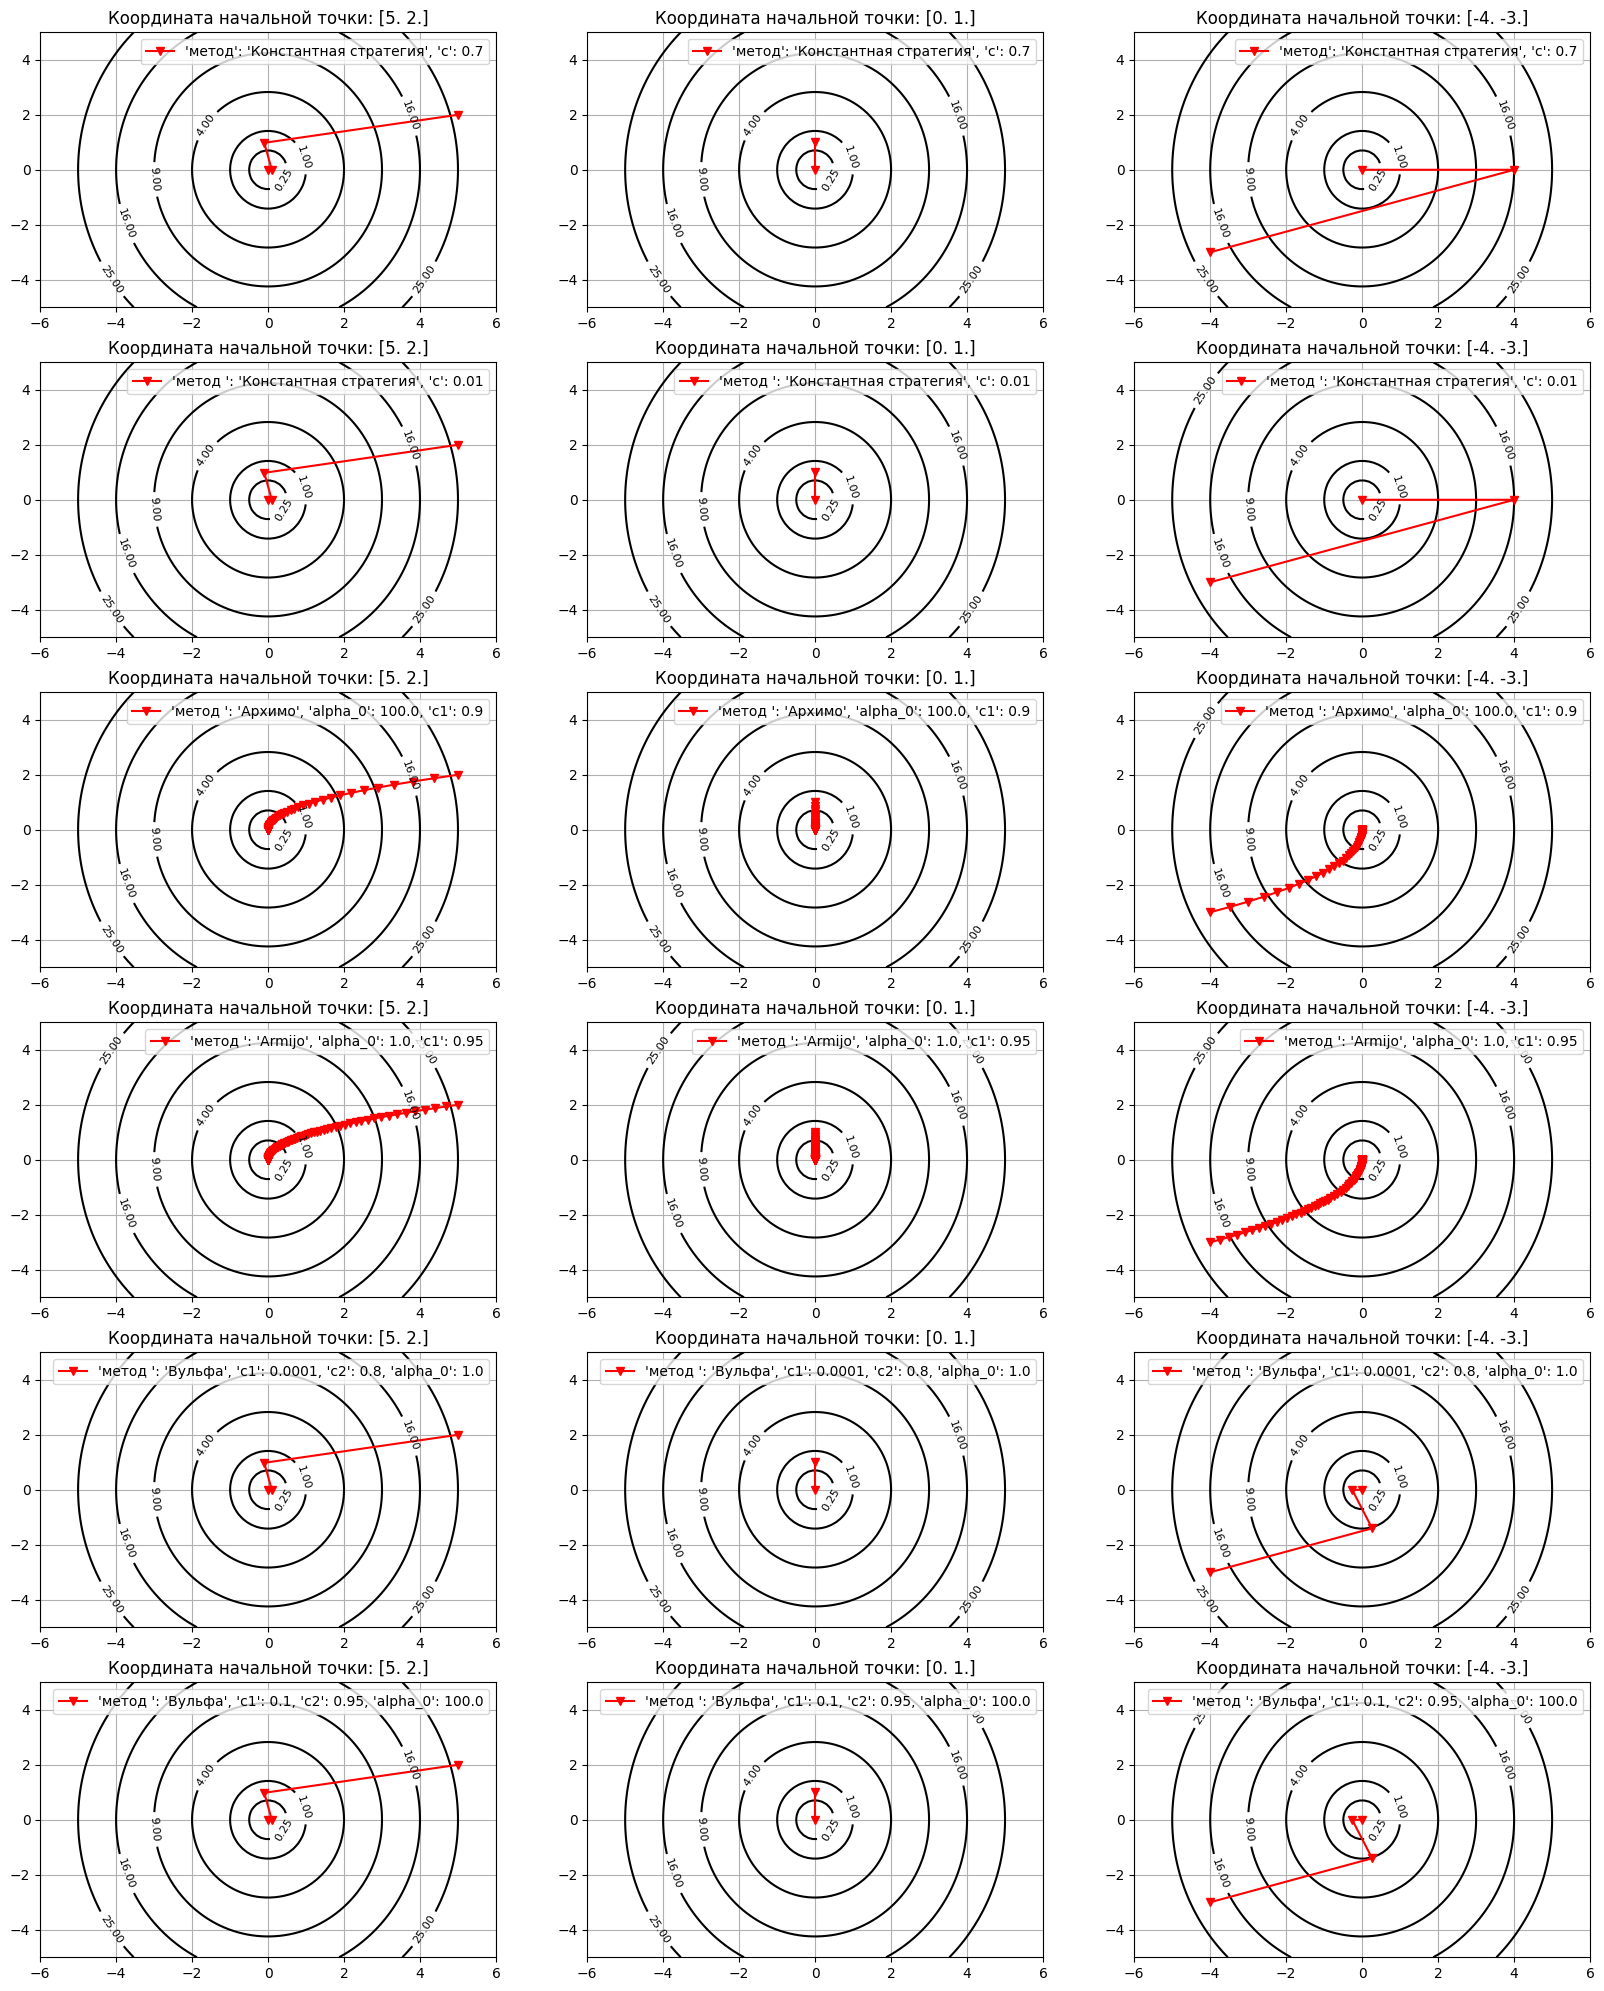

In [5]:
fig, ax = plt.subplots(len(methods), len(x_start), figsize = (20,25))
for i in range(len(methods)):
    for j in range(len(x_start)):
        [x_star, msg, history] = optimization.gradient_descent(oracle, x_start[j], 
                                                               line_search_options = methods[i], trace=True)
        plot_levels(oracle.func, ax[i][j])
        plot_trajectory(oracle.func, history['x'], ax[i][j], label=str(methods[i])[1:-1])
        ax[i][j].set_title("Координата начальной точки: " + str(x_start[j]))
        ax[i][j].legend()

In [6]:
#Плохо обусловленная матрица

A = np.array([[1., -1.1],[-1.1, 2.001]])
b = np.array([2., 2.2])
oracle = oracles.QuadraticOracle(A, b)
print('Число обусловленности:', np.linalg.norm(A) * np.linalg.norm(np.linalg.inv(A)))

Число обусловленности: 9.385589127686476


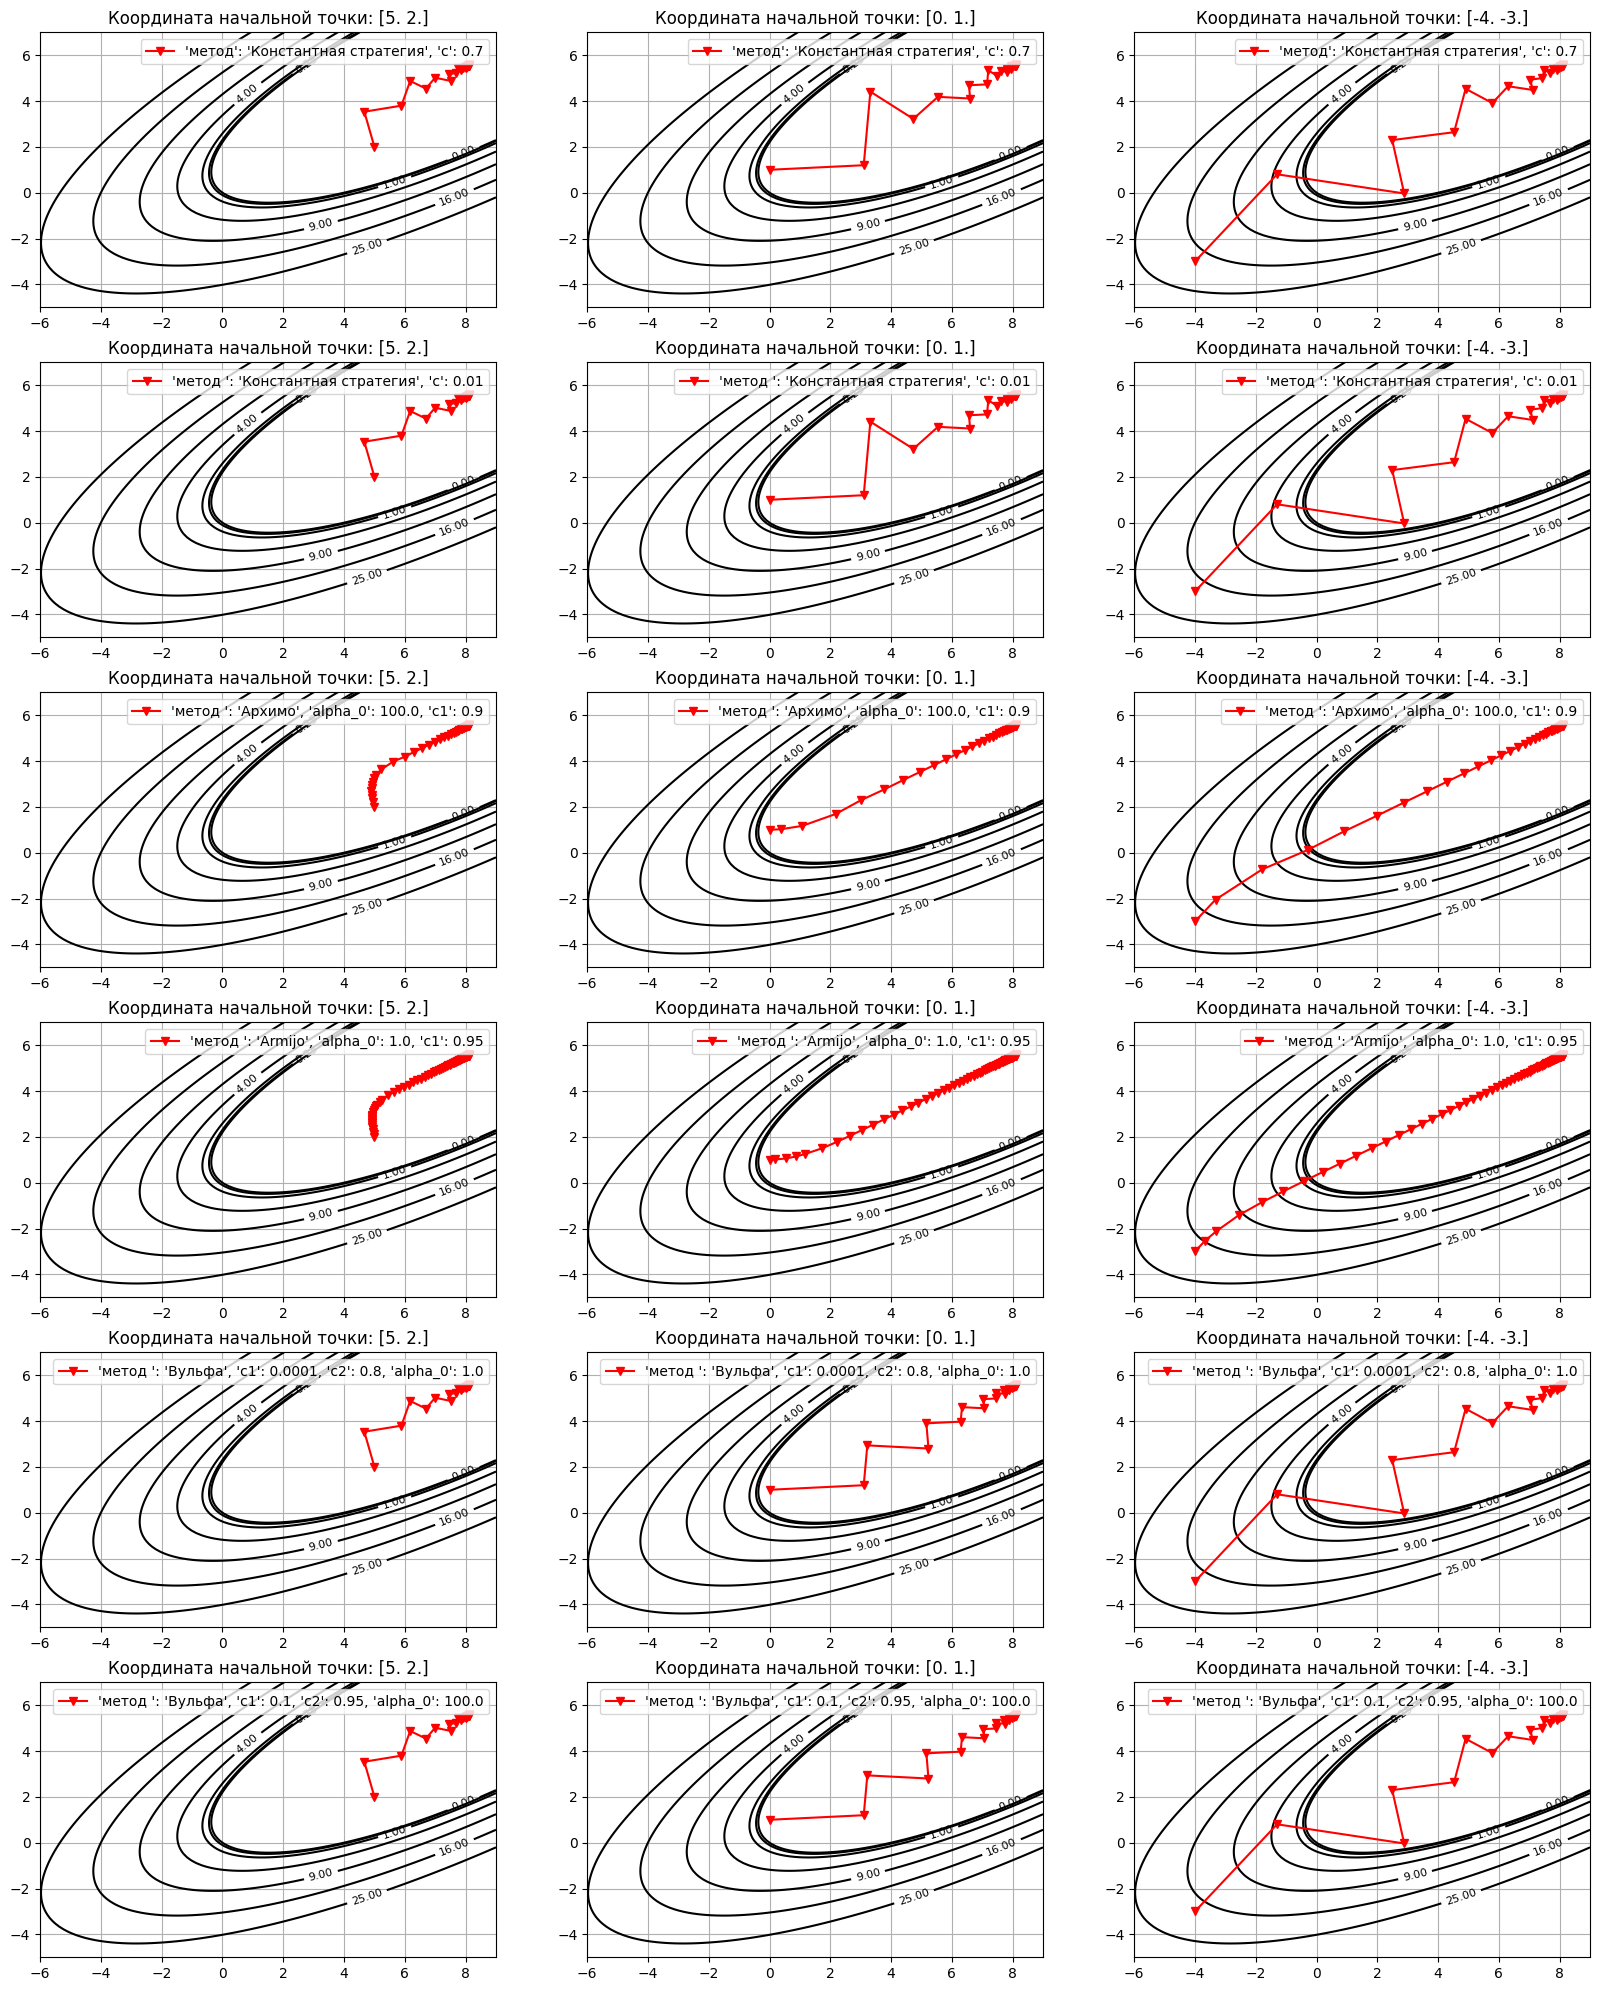

In [7]:
#Реализация данного эксперимента на графиках для плохо обусловленной матрицы

fig, ax = plt.subplots(len(methods), len(x_start), figsize = (20,25))
for i in range(len(methods)):
    for j in range(len(x_start)):
        [x_star, msg, history] = optimization.gradient_descent(oracle, x_start[j], line_search_options = methods[i], trace=True)
        plot_levels(oracle.func, ax[i][j], xrange=[-6,9], yrange=[-5,7])
        plot_trajectory(oracle.func, history['x'], ax[i][j], label=str(methods[i])[1:-1])
        ax[i][j].set_title("Координата начальной точки: " + str(x_start[j]))
        ax[i][j].legend()

**ВЫВОД**:
По приведённым выше рисункам можно сделать следующие выводы:

1. С точки зрения точности и показателя числа итераций метод Вульфа лучше всех ведёт себя на графиках приведённых выше;
2. Число итераций зависит от выбора начальной точки: чем дальше мы выбираем начальную точку (переходим на отрицательные оси), тем больше становится чило итераций;
3. Характерные зигзаги особенно выделяются на плохо обусловленной матрице.

## 3.2 Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследовал, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров: 
1) числа обусловленности $κ ≥ 1$ оптимизируемой функции;
2) размерности пространства $n$ оптимизируемых переменных.  

Для выполнения данного эксперимента для заданных параметров сгенерировал случайным образом квадратичную задачу размера n с числом обусловленности b, запустил на ней градиентный спуск с некоторой фиксированной требуемой точностью. Также реализовал метод градиентного спуска, приведённого в эксперименте №3.1

In [8]:
K = np.arange(1, 101, 10)
options = [(10, 'g'), (100, 'r'), (1000, 'y')]

methods = [{'метод ':'Константная стратегия: ', "c":0.01}, 
           {'метод ':'Архимо: ', 'alpha_0':1.0, 'c1':0.95}, 
           {"метод ":'Вульфа: ', 'c1':1e-3, 'c2':0.9, 'alpha_0':1.0}]

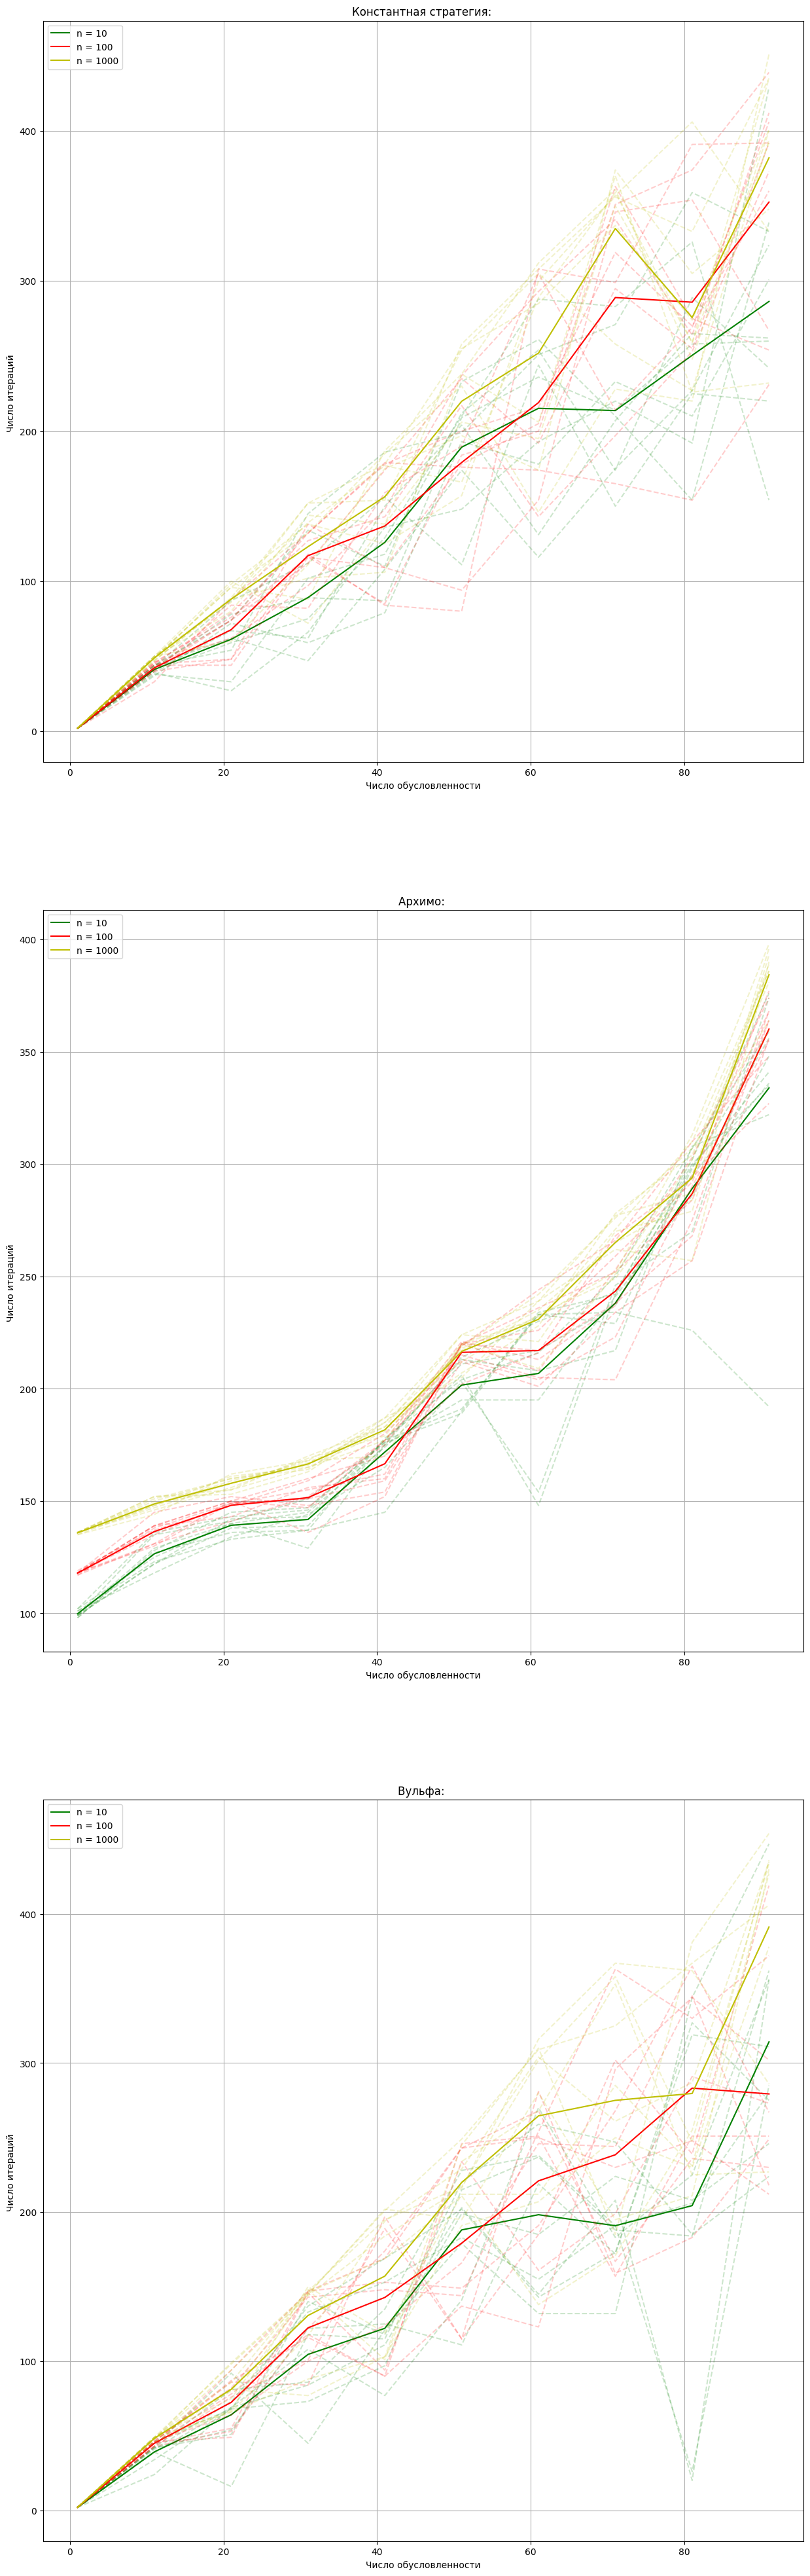

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(15,50))

for i in range(len(methods)):
    for option in options:
        I = np.zeros(len(K))
        for j in range(10):
            it = []
            for k in K:
                diag = np.random.uniform(1, k, option[0])
                diag[0] = 1.; diag[-1] = k
                A = scipy.sparse.diags(diag)
                b = np.random.rand(option[0])*k
                oracle = oracles.QuadraticOracle(A, b)
                _, _, history = optimization.gradient_descent(oracle, np.ones(option[0]), 
                                                              line_search_options = methods[i], trace=True)
                it.append(len(history['func']))
            I += np.array(it)
            ax[i].plot(K, it, color=option[1], linestyle='dashed', alpha=0.2)
        ax[i].plot(K, I / 10, color=option[1], label=('n = '+str(option[0])))
        ax[i].legend()
        ax[i].set_xlabel("Число обусловленности")
        ax[i].set_ylabel("Число итераций ")
        ax[i].set_title(methods[i]['метод '])
        ax[i].grid()

**ВЫВОД**: Эксперимент №3.2 показал, что с ростом числа обусловленности  $κ ≥ 1$ оптимизируемой функции число итераций линейно возрастает. Однако на графиках хорошо видно, что размерность пространства 𝑛 оптимизируемых переменных не критично влияет на рост числа итераций.

## 3.3 Эксперимент: Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

**Цель**: Сравнить методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на реальных данных.


Построить графики сходимости следующих двух видов:  
1) Зависимость значения функции от реального времени работы метода.  
2) Зависимость относительного квадрата нормы градиента $‖∇f(x_k)‖^2_2 /‖∇f(x_0)‖^2_2$ (в логарифмической шкале) против реального времени работы.

При этом оба метода (градиентный спуск и Ньютон) нужно рисовать на одном и том же графике.
Укажите в отчете, какова стоимость итерации и сколько памяти требуется каждому из методов в
зависимости от параметров $m$ (размер выборки) и $n$ (размерность пространства). При оценке используйте нотацию $O(·)$, скрывающую внутри себя абсолютные константы.

In [10]:
#Задаю данные из существующих трёх наборов 
#(данные взяты с сайта LIBSVM http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/. : w8a, gisette и real-sim)

A1, b1 = load_svmlight_file('data/w8a.txt')
A2, b2 = load_svmlight_file('data/gisette_scale.bz2')
A3, b3 = load_svmlight_file('data/real-sim.bz2')

data = [(A1, b1, "w8a"), (A2, b2, "gisette_scale"), (A3, b3, "real-sim")]

Метод градиентного спуска я уже использовал в предыдущих экспериментах.
Для реализации метода Ньютона, давайте обратимся сначала к теоретической справке:

**Метод Ньютона**:
$$x_{k+1}=x_k−α_k[∇^2 f(x_k)]^{-1} ∇f(x_k).$$
Для метода Ньютона очень важно использовать единичный шаг $α_k = 1$, чтобы обеспечить локальную квадратичную сходимость. Поэтому в алгоритмах линейного поиска нужно всегда первым делом
пробовать единичный шаг. Теория гарантирует, что в зоне квадратичной сходимости метода Ньютона
единичный шаг будет удовлетворять условиям Армихо/Вульфа, и поэтому автоматически будет приниматься. Если единичный шаг не удовлетворяет условиям Армихо/Вульфа, то алгоритмы линейного
поиска его уменьшат и, тем самым, обеспечат глобальную сходимость метода Ньютона.  

Вычисление Ньютоновского направления $d_k=−[∇^2 f(x_k)]^{-1} ∇f(x_k)$ эквивалентно решению линей-
ной системы уравнений:
$$∇^2 f(x_k)d_k=−∇f(x_k).$$
Если гессиан - положительно определённая матрица: $∇^2 f(x_k) \succ 0$ , то предпочтительным методом решения такой системы является разложение Холецкого, которое также, как и метод Гаусса, работает за $O(n^3)$, но является вычислительно более эффективным. Если матрица системы не является положительно определённой, то метод Холецкого сможет обнаружить и сообщить об этом.

In [11]:
def image_time(item):
    regcoef = 1 / len(item[1])
    oracle = oracles.create_log_reg_oracle(item[0], item[1], regcoef)
    _, _, history_gd = optimization.gradient_descent(oracle, np.zeros(item[0].shape[1]), trace=True)
    _, _, history_n = optimization.newton(oracle, np.zeros(item[0].shape[1]), trace=True)

#Зависимость значения функции от реального времени работы метода
    ax[0].plot(history_gd['time'], history_gd['func'], label="Градиентный спуск", color='black')
    ax[0].plot(history_n['time'], history_n['func'], label="метод Ньютона", color='green')
    ax[0].set_xlabel('Реальное время работы ')
    ax[0].set_ylabel('Значение функции')
    ax[0].legend()
    ax[0].set_title(item[2])
    ax[0].grid()
    
#Зависимость относительного квадрата нормы градиента  ‖∇𝑓(𝑥𝑘)‖22/‖∇𝑓(𝑥0)‖22 
#(в логарифмической шкале) против реального времени работы.
    ax[1].plot(history_gd['time'], np.array(history_gd['grad_norm'])**2 / (history_gd['grad_norm'][0]**2), label="Градиентный спуск")
    ax[1].plot(history_n['time'], np.array(history_n['grad_norm'])**2 / (history_n['grad_norm'][0]**2), label="Ньютон")
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Время работы')
    ax[1].set_ylabel(r'$\vert\vert \nabla f(x_k) \vert\vert_2^2 / \vert\vert \nabla f(x_0) \vert\vert_2^2$')
    ax[1].legend()
    ax[1].set_title(item[2])
    ax[1].grid()

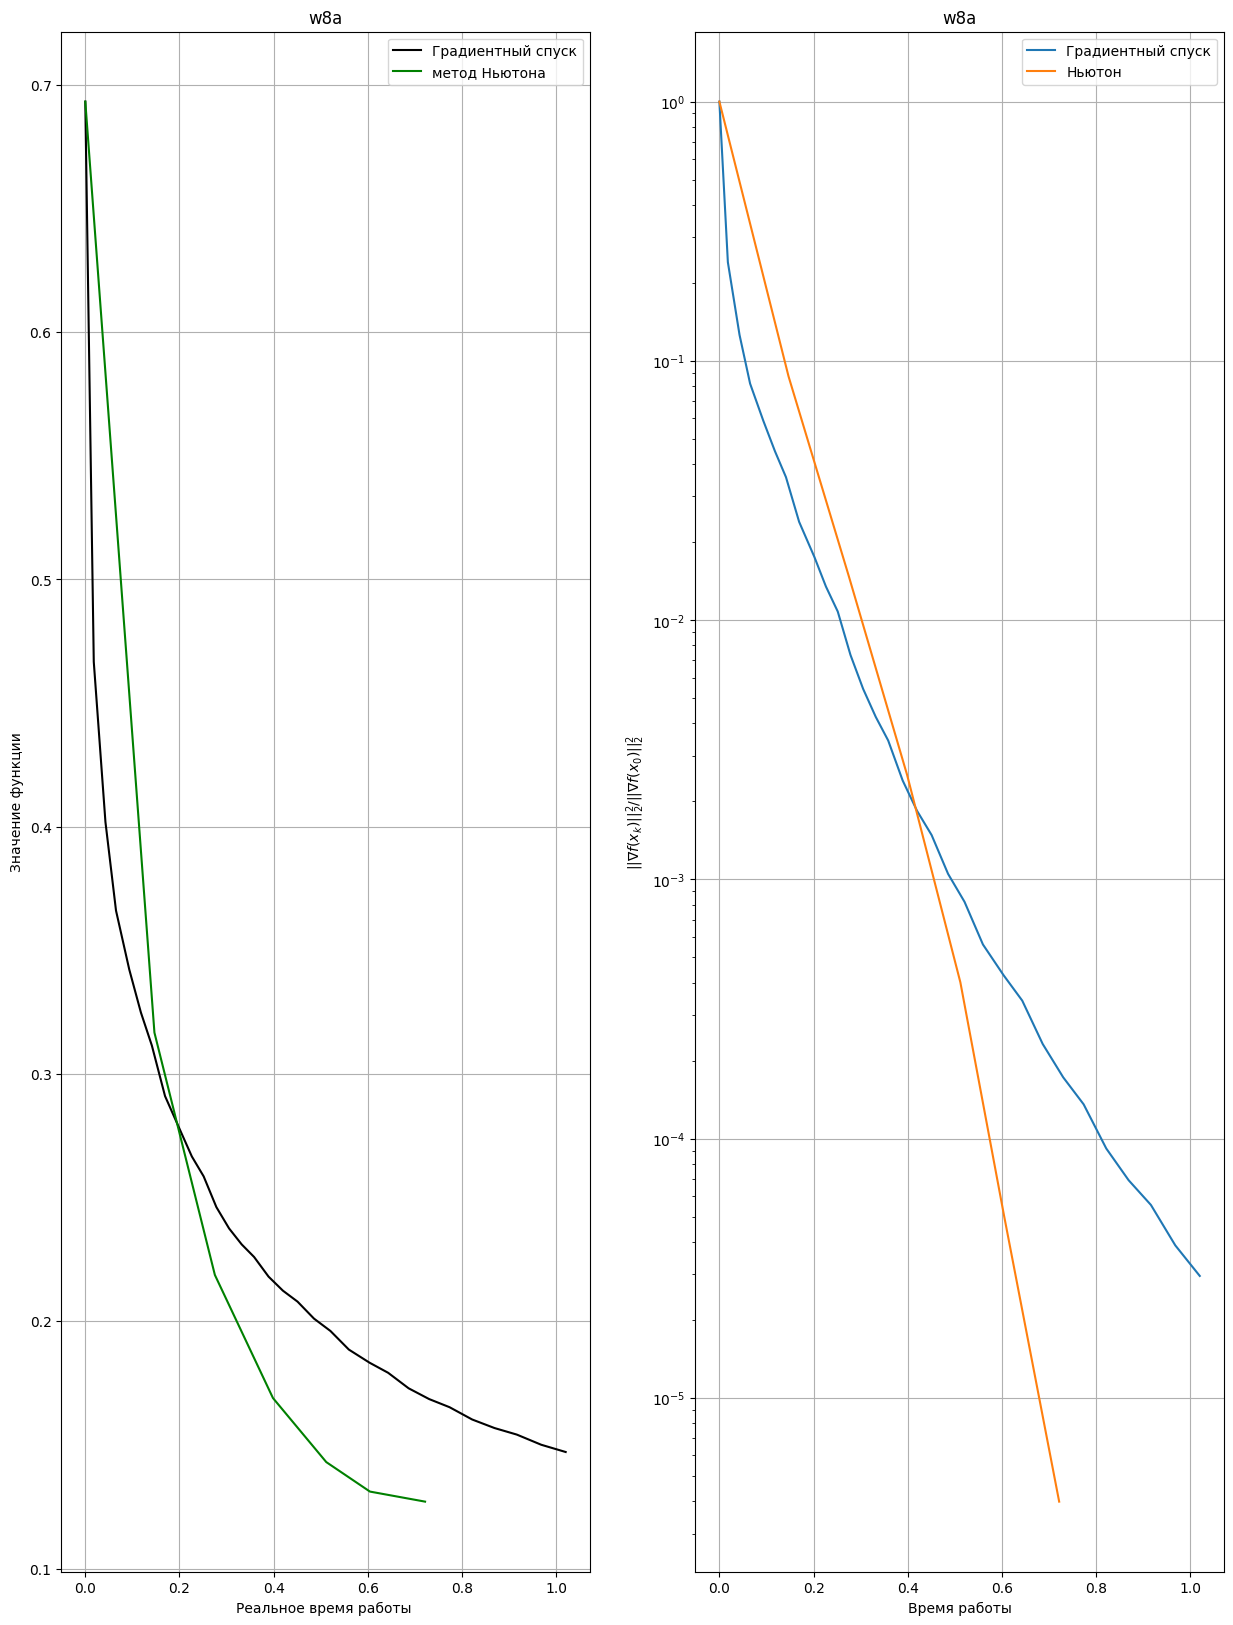

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15,20))
image_time(data[0])

KeyboardInterrupt: 

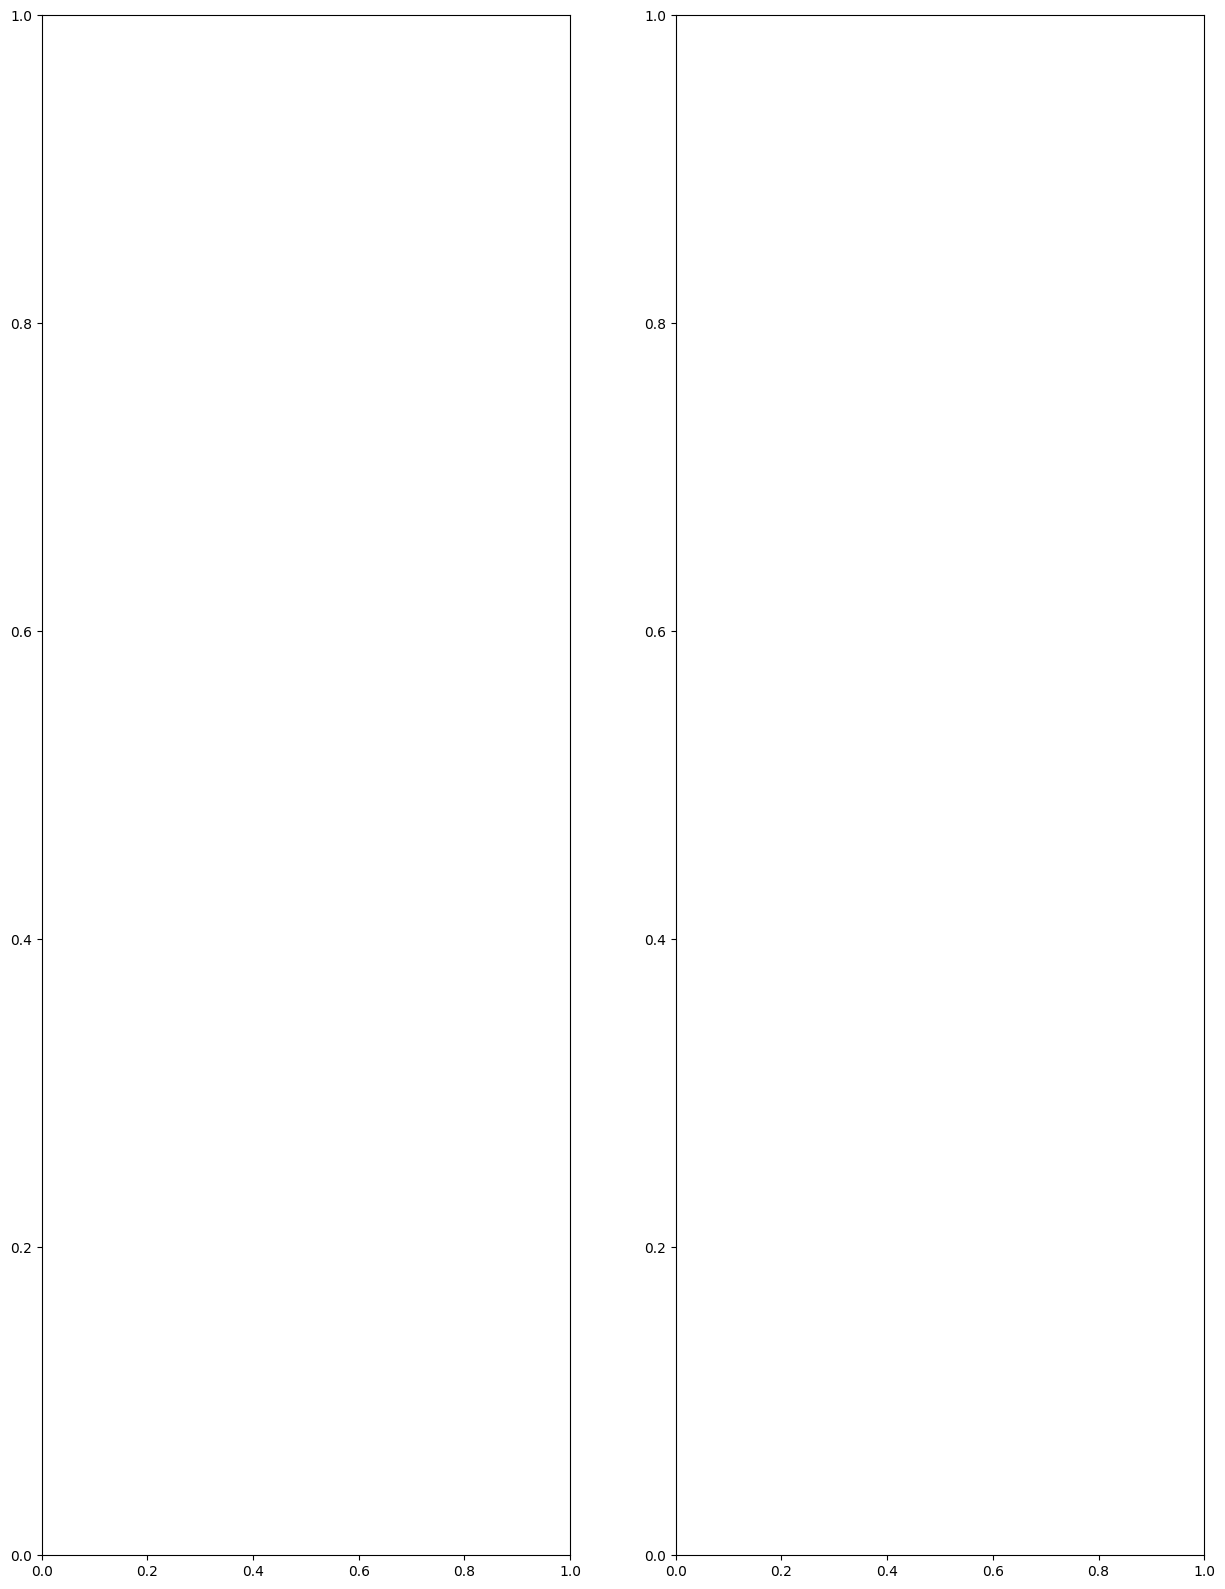

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,20))
image_time(data[1])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,20))
image_time(data[2])

**ЗАМЕЧАНИЕ**: Для проведения расчетов для данных gisette_scale и real-sim требуется большое количество времени и памяти. Спутя несколько часов работы двух предыдущих программ, мне так и не удалось скомпилировать код и построить графики.

**АНАЛИЗ ВРЕМЕННОЙ СЛОЖНОСТИ**:

***oracles.create_log_reg_oracle*** - O(n * m), где n - кол-во признаков (features), m - кол-во выборок (samples).

***optimization.gradient_descent*** - O(k * n), где k - кол-во повторений, n - кол-во признаков (features). 

***optimization.newton*** - O(k * n^2), где k - кол-во повторений, n - кол-во признаков (features).

***Общая временная сложность*** - O(n^2).

**ВЫВОД**: Метод градиентного спуска работает быстрее в начале запуска программы, однако замедляется при последующей работе и, в целом, требует больше времени для получения малой заданной точности, чем метод Ньютона. 

## 4. Проверка заданных тестов

In [14]:
pt.test_python3()
pt.test_QuadraticOracle()
pt.test_log_reg_usual()
pt.test_log_reg_oracle_calls()
pt.test_grad_finite_diff_1()
pt.test_grad_finite_diff_2()
pt.test_hess_finite_diff_1()
pt.test_hess_finite_diff_2()
pt.test_line_search()
pt.test_gd_basic()
pt.test_newton_basic()
pt.test_newton_1d()
pt.test_newton_fail()

Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]


**ВЫВОД**: Как можно заметить из тестов, проведённых выше, все тесты сработали, ошибок не выявлено!